# Michelson interferometer frequency response to gravitational wave perturbation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
#import diss as diss 
%matplotlib inline
plt_style_dir = 'stash/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# Some parameters
cee = np.float64(299792458)
OMEG = np.float64(2*np.pi*cee/(1064.0*10-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)

## Derivation*

For the simple Michelson we know that a change in arm length correlates to light at the AS port
We also know that a differential arm length corresponds to a difference in phase of the light that impinges upon the BS
For a gravitational wave we can quantify the phase difference in this following way: 

$$
\phi_A - \phi_B = \int_{t-2L/c}^{t} \Omega \bigg[1 + \frac{1}{2}h(t)\bigg]dt - \int_{t-2L/c}^{t} \Omega \bigg[1 - \frac{1}{2}h(t)\bigg]dt \label{eq1}\tag{1}
$$
The phase difference can then be quantified by:
$$
\phi_A - \phi_B = \int_{t-2L/c}^{t} \Omega h(t)dt \label{eq2}\tag{2}
$$
where 
$$ 
h(t) = h_0 e^{i \omega t} \label{eq3}\tag{3}
$$

*$\Omega$* is the **optical angular frequency**

After evaluating this integral we get: 
$$
\Delta \phi=\phi_A - \phi_B = \frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} \cdot h_0 e^{i \omega t}
$$

Where the first term in the phase difference carries all the time independent frequency information. This is what we are calculating below. 

For the sake of being explicit, we are going to plot: 
$$
\Delta \phi (\omega) = h_0\frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c}
$$


In [3]:
def mich_freq_resp(freq, Length, OMEGA):
    return 2.0*Length*OMEGA*np.exp((-1j*L*2.0*np.pi*freq)/cee)*np.sin((L*2.0*np.pi*freq)/cee)/(L*2.0*np.pi*freq)

In [4]:
H = mich_freq_resp(nu,L,OMEG)

Text(0, 0.5, 'phase [deg]')

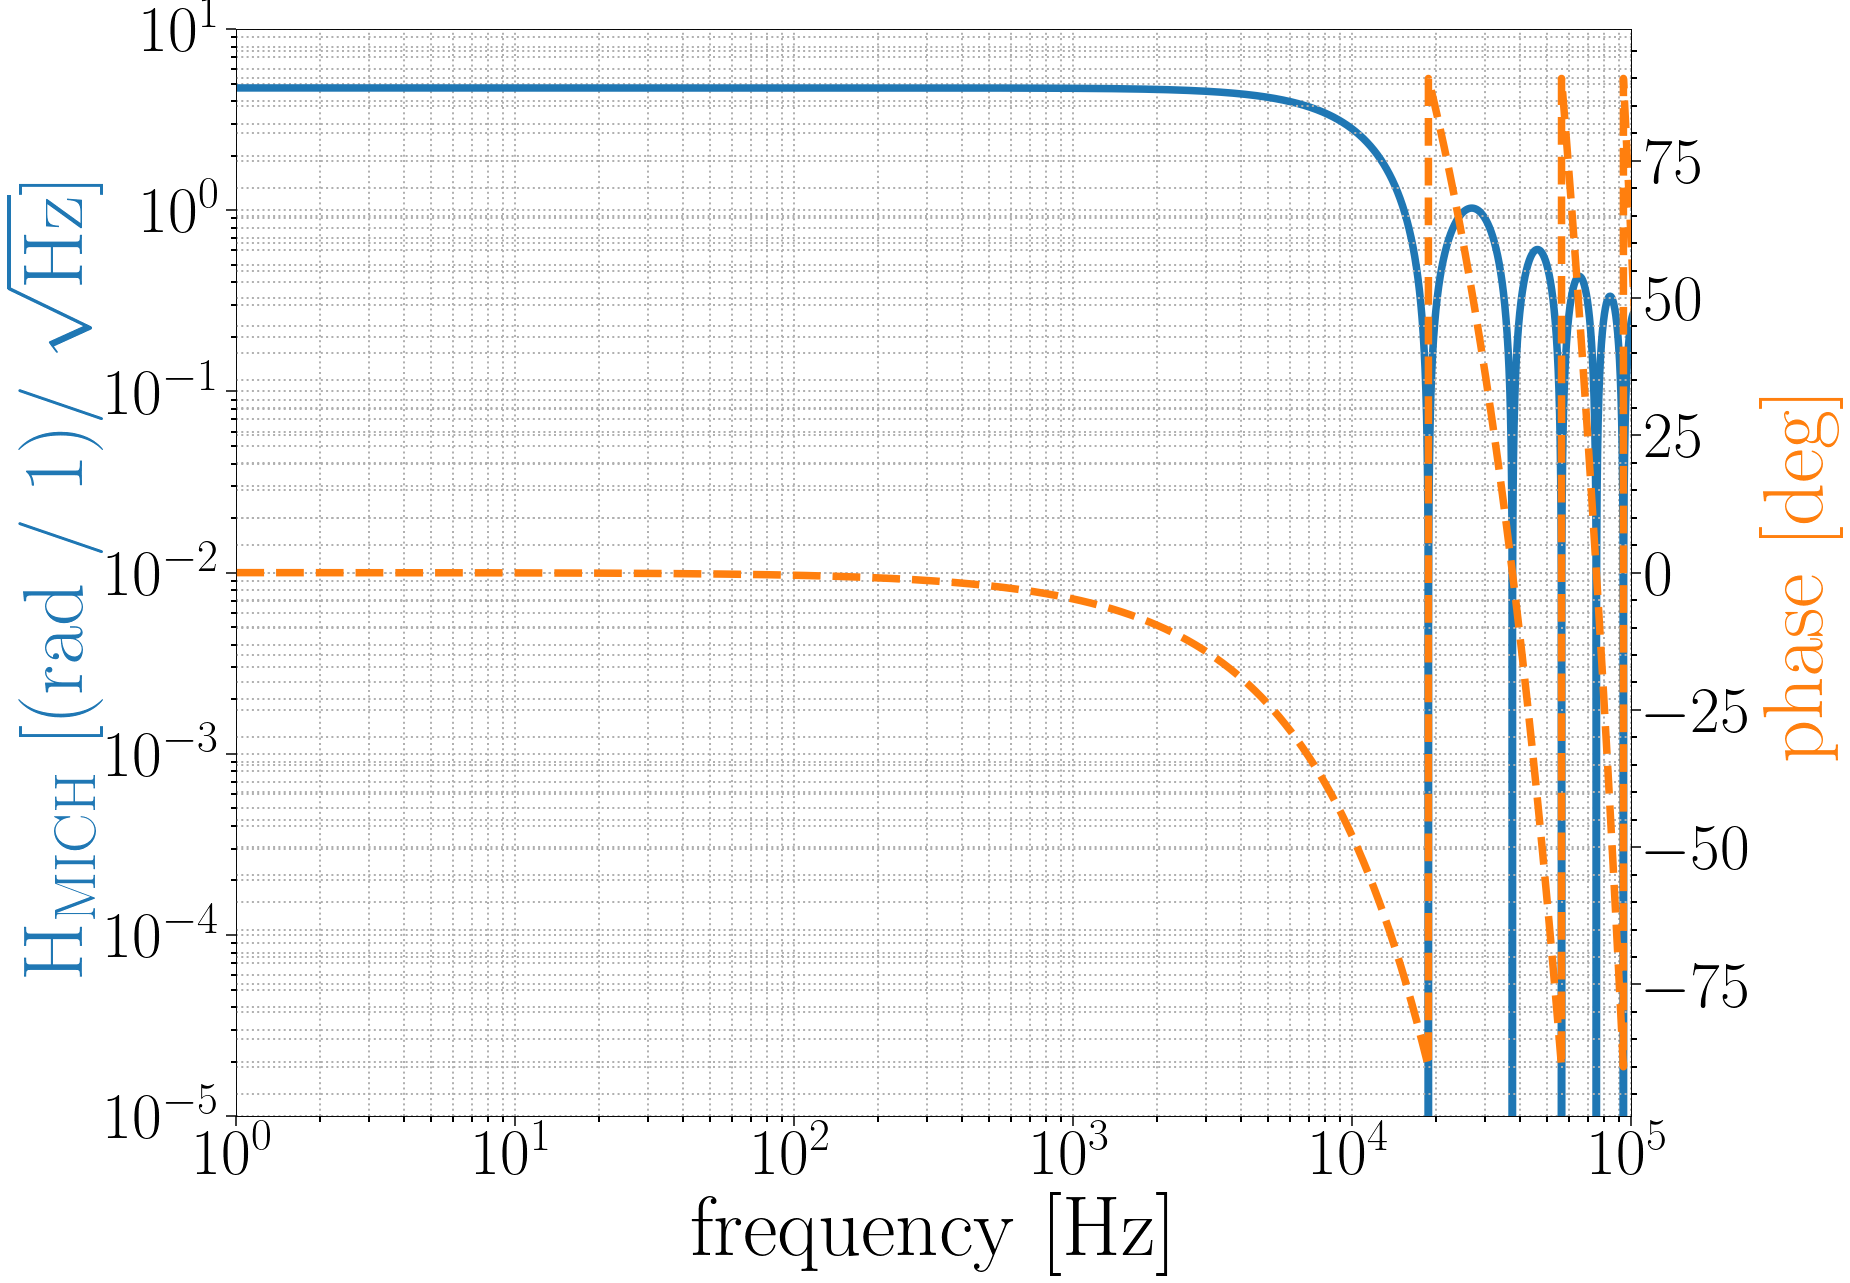

In [5]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('H$_{\mathrm{MICH}}$ [(rad / 1)/ $\sqrt{\mathrm{Hz}}$]',color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1.loglog(nu,np.abs(np.real(H)),linewidth=7.5, color='C0')
plt.ylim([10e-6, 10e0])
ax2 = ax1.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
ax2.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H)/np.real(H)), '--', linewidth=7.5,color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([1,1e5])
plt.ylabel('phase [deg]',color='C1')

In [6]:
fig.savefig('../figs/INTRO/mich_fr.pdf', dpi=300, bbox_inches='tight')

### *The derivation noted was heavily influenced by Koji's explanation in DCC G1401144